In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
np.random.seed(0)


In [72]:

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow import keras
import cv2

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:08<00:00, 23.3MB/s]
100% 149M/149M [00:08<00:00, 19.3MB/s]


In [7]:
!ls

brain-tumor-mri-dataset.zip  kaggle.json  sample_data


In [8]:
with ZipFile('brain-tumor-mri-dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [10]:
# Basically , We have classes
# 1) Glioma
# 2) Meningioma
# 3) Pituitary
# 4) No Tumor

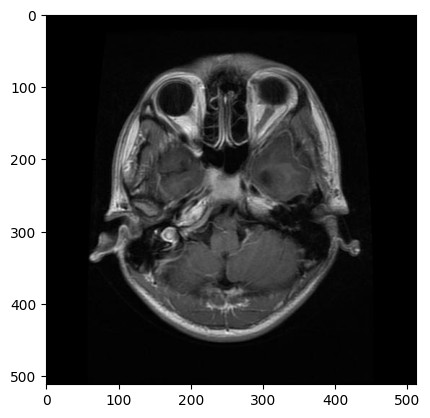

In [11]:
# 1) Glioma
image=plt.imread('/content/Testing/glioma/Te-glTr_0003.jpg')
plt.imshow(image)

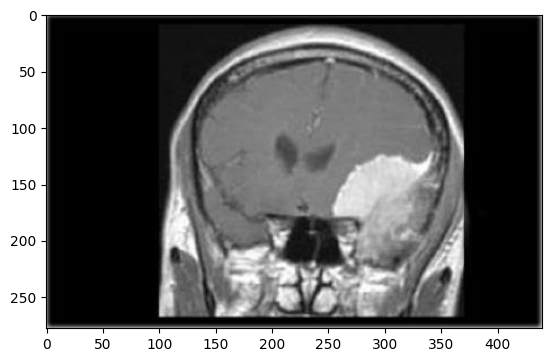

In [12]:
# 2) Meningioma
img=plt.imread('/content/Testing/meningioma/Te-meTr_0000.jpg')
plt.imshow(img)

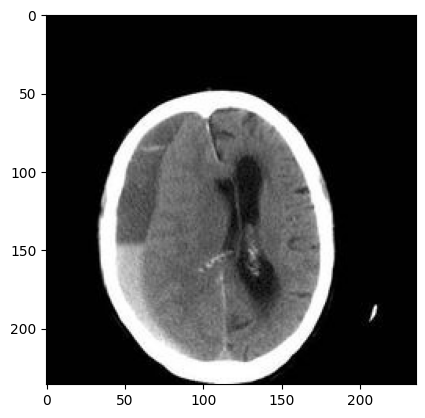

In [13]:
# 3) Pituitary
img=plt.imread('/content/Testing/notumor/Te-noTr_0000.jpg')
plt.imshow(img)

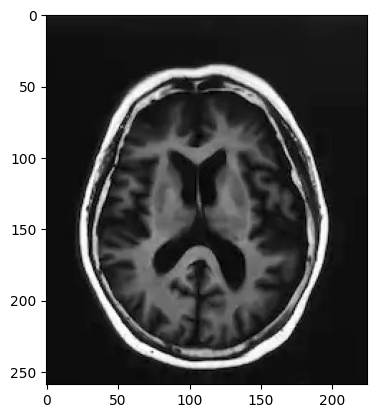

In [14]:
# 4) No Tumor
img=plt.imread('/content/Testing/notumor/Te-noTr_0003.jpg')
plt.imshow(img)

In [20]:
# Now Checking the Total Number of images of each players
org_dir='/content/Training/'
Tumors=os.listdir(org_dir)

print('Training data')
print(Tumors)
print(f'Total Numbers of Classes in dataset are {len(Tumors)}')

# Now Checking the Total Number of images of each players
org_dir_2='/content/Testing/'
Tumors1=os.listdir(org_dir)

print('\nTesting data')
print(Tumors1)
print(f'Total Numbers of Classes in dataset are {len(Tumors1)}')

Training data
['notumor', 'meningioma', 'glioma', 'pituitary']
Total Numbers of Classes in dataset are 4

Testing data
['notumor', 'meningioma', 'glioma', 'pituitary']
Total Numbers of Classes in dataset are 4


In [21]:
# Meanwhile Checking the total Number of images of Each player in the directory
total_images=0
print('Trianing Dataset ')
for i in Tumors:
  images=os.listdir(org_dir+i)
  total_images+=len(images)
  print(f'Total Number of images of {i} are : {len(os.listdir(org_dir+i))}')
print(f'Total Images in dataset is {total_images}')

Total Number of images of notumor are : 1595
Total Number of images of meningioma are : 1339
Total Number of images of glioma are : 1321
Total Number of images of pituitary are : 1457
Total Images in dataset is 5712


In [22]:
# Meanwhile Checking the total Number of images of Each player in the directory
total_images=0
print('Trianing Dataset ')
for i in Tumors1:
  images=os.listdir(org_dir_2+i)
  total_images+=len(images)
  print(f'Total Number of images of {i} are : {len(os.listdir(org_dir_2+i))}')
print(f'Total Images in dataset is {total_images}')

Trianing Dataset 
Total Number of images of notumor are : 405
Total Number of images of meningioma are : 306
Total Number of images of glioma are : 300
Total Number of images of pituitary are : 300
Total Images in dataset is 1311


In [61]:
# We will use only Training Folder

In [53]:
Batch_size=64
img_height=224
img_width=224

In [54]:
data_gen_train=ImageDataGenerator(rescale=1./255,
                            validation_split=0.2,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )

In [55]:
train_data=data_gen_train.flow_from_directory(org_dir,
                                     target_size=(img_height,img_width),
                                     batch_size=Batch_size,
                                     class_mode='categorical',
                                     subset='training')

Found 4571 images belonging to 4 classes.


In [56]:
test_data=data_gen_train.flow_from_directory(org_dir,
                                     target_size=(img_height,img_width),
                                     batch_size=Batch_size,
                                     class_mode='categorical',
                                     subset='validation')

Found 1141 images belonging to 4 classes.


In [57]:
validation_data=data_gen_train.flow_from_directory(org_dir,
                                     target_size=(img_height,img_width),
                                     batch_size=Batch_size,
                                     class_mode='categorical',
                                     subset='validation')

Found 1141 images belonging to 4 classes.


In [58]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [59]:
test_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [51]:
# Convolutional Neural Network (CNN) Model for Brain Tumor Classification

# Model Definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes (Glioma, Meningioma, Pituitary, No Tumor)
])

# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Model Training
history = model.fit(
    train_data,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_data
)

# Model Evaluation
train_loss, train_acc = model.evaluate(train_data)
print(f'Train accuracy: {train_acc}')

# Model Evaluation
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.3465 - loss: 1.5473 - val_accuracy: 0.5048 - val_loss: 1.1814
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6179 - loss: 0.8796 - val_accuracy: 0.6152 - val_loss: 1.0453
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 933ms/step - accuracy: 0.6503 - loss: 0.8300 - val_accuracy: 0.6617 - val_loss: 0.9551
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7106 - loss: 0.7089 - val_accuracy: 0.6643 - val_loss: 0.9712
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 926ms/step - accuracy: 0.7225 - loss: 0.6708 - val_accuracy: 0.6643 - val_loss: 0.9535
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 72s 942ms/step - accuracy: 0.7326 - loss: 0.6481 - val_accuracy: 0.6968 - val_loss: 1.0054
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 927ms/step - accuracy: 0.7430 - loss: 0.6275 - val_accuracy: 0.6705 - val_loss: 0.8672
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 935ms/step - accuracy: 0.7739 - loss: 0.5708 - val_accuracy: 0.7248 - val_l

In [62]:
# Using Transfer Learning with a pre-trained model (e.g., InceptionV3)
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layer
base_model.trainable = False

# Create a new model on top of the pre-trained model
model_transfer = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),  # Add Dropout
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model_transfer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (only the top layers will be trained)
history_transfer = model_transfer.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)

# Evaluate the transfer learning model
train_loss_transfer, train_acc_transfer = model_transfer.evaluate(train_data)
print(f'Train accuracy (Transfer Learning): {train_acc_transfer}')

test_loss_transfer, test_acc_transfer = model_transfer.evaluate(test_data)
print(f'Test accuracy (Transfer Learning): {test_acc_transfer}')


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5410 - loss: 1.1296 - val_accuracy: 0.6933 - val_loss: 0.7863
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 72s 934ms/step - accuracy: 0.7767 - loss: 0.6058 - val_accuracy: 0.7046 - val_loss: 0.7557
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 935ms/step - accuracy: 0.8186 - loss: 0.5069 - val_accuracy: 0.7371 - val_loss: 0.7011
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 944ms/step - accuracy: 0.8324 - loss: 0.4642 - val_accuracy: 0.7493 - val_loss: 0.6986
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 941ms/step - accuracy: 0.8328 - loss: 0.4444 - val_accuracy: 0.7739 - val_loss: 0.6167
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 933ms/step - accuracy: 0.8464 - loss: 0.4163 - val_accuracy: 0.7599 - val_loss: 0.6132
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8491 - loss: 0.4160 - val_accuracy: 0.7590 - val_loss: 0.6207
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 939ms/step - accuracy: 0.8522 - loss: 0.4108 - val_accuracy: 

In [74]:
model.evaluate(test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 770ms/step - accuracy: 0.6998 - loss: 0.8667


[0.8109351992607117, 0.7204206585884094]

In [81]:
# now comming to prediction by single picture
input_image_path = input('Enter the Path of Your Image : ')  # Replace with the path to your input image
image=cv2.imread(input_image_path)
image=cv2.resize(image,(224,224))
image=image/255.0
image=np.expand_dims(image,axis=0)
output=model.predict(image)
output=np.argmax(output)
print(output)

Enter the Path of Your Image : /content/Testing/notumor/Te-noTr_0001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2


In [82]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [84]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>